In [1]:
import pandas as pd 
df = pd.read_csv("D:\\ML\\23. ML - Polynomial (Multiple) Regression Data - 2.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Preparation

In [2]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [4]:
df['sex'] = df['sex'].replace({'female': 1, 'male': 2})
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 2})
df['region'] = df['region'].replace({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

### Defining Input Features and Target Variable

In [5]:
x = df.drop(columns = ['charges'])
y = df[['charges']]

In [6]:
y.ndim

2

### Split for Training and Testing

In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 1)

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

#### For x_test predection

In [10]:
z = lr.predict(X_test)

In [11]:
import matplotlib.pyplot as plt

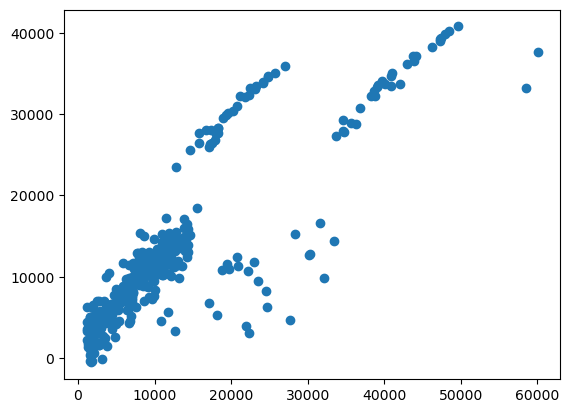

In [12]:
plt.scatter(y_test , z)

#### For x_train predection

In [13]:
z1 = lr.predict(X_train)

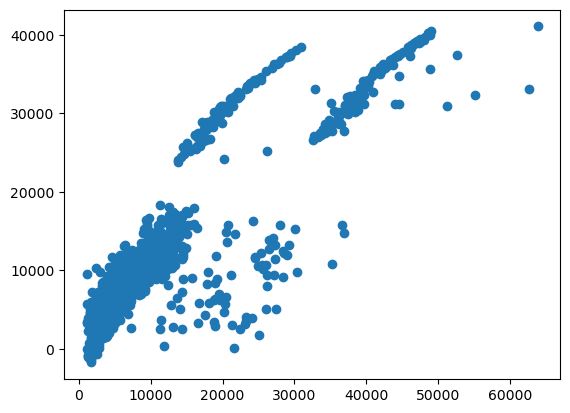

In [14]:
plt.scatter(y_train , z1)

## Scaling the Data (Standard Scaler)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
# y_train_scaler = scaler.fit_transform(y_train)  # First check without scalling (y , y_train , y_test) , if we got less accuarcy means then try this...
# y_test_scaler = scaler.transform(y_test)

## Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree=3)

In [17]:
X_train_poly = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)
# y_train_poly = poly.fit_transform(y_train_scaler)
# y_test_poly = poly.transform(y_test_scaler)

In [32]:
poly.fit(X_train_poly, y_train)          ## no need to use fit & predict in Polynomial feature

PolynomialFeatures(degree=3)

## Again Linaer Regression

In [19]:
from sklearn.linear_model import LinearRegression 
lr1 = LinearRegression()

In [20]:
lr1.fit(X_train_poly, y_train)

LinearRegression()

### X_train_poly Predection

In [21]:
z2 = lr1.predict(X_train_poly)

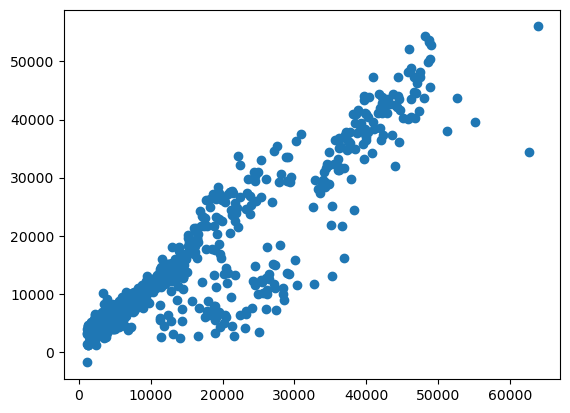

In [22]:
plt.scatter(y_train,z2)

### x_test_poly Predection

In [23]:
z3 = lr1.predict(X_test_poly)

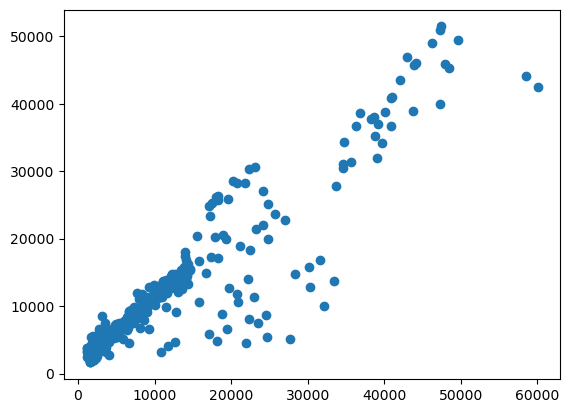

In [24]:
plt.scatter(y_test,z3)

### Score

In [25]:
lr1.score(X_test_poly , y_test )

0.8370510280631364

### Mean_absolute_Error

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train, z2)

2811.042991534397

In [27]:
y_pred_train = lr1.predict(X_train_poly)
mean_absolute_error(y_train, z2)

2811.042991534397

In [28]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, z3)

2811.332370597015

In [29]:
y_pred_train = lr1.predict(X_test_poly)
mean_absolute_error(y_test, z3)

2811.332370597015